In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML_Class/datakelulusanmahasiswa.xlsx - Sheet1.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 2. Tampilkan data awal
print("===== 5 Data Teratas =====")
display(data.head())

print("===== Info Dataset =====")
print(data.info())

print("===== Missing Values =====")
print(data.isnull().sum())

===== 5 Data Teratas =====


,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,PEREMPUAN,BEKERJA,28,BELUM MENIKAH,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,TERLAMBAT
1,DWI HESTYNA PRIHASTANTY,PEREMPUAN,MAHASISWA,32,BELUM MENIKAH,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,TERLAMBAT
2,MURYA ARIEF BASUKI,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,TERLAMBAT
3,NANIK SUSANTI,PEREMPUAN,MAHASISWA,27,BELUM MENIKAH,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,TERLAMBAT
4,RIFKA ISTIQFARINA,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,TERLAMBAT


===== Info Dataset =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAMA              379 non-null    object 
 1   JENIS KELAMIN     379 non-null    object 
 2   STATUS MAHASISWA  379 non-null    object 
 3   UMUR              379 non-null    int64  
 4   STATUS NIKAH      379 non-null    object 
 5   IPS 1             379 non-null    float64
 6   IPS 2             379 non-null    float64
 7   IPS 3             379 non-null    float64
 8   IPS 4             379 non-null    float64
 9   IPS 5             379 non-null    float64
 10  IPS 6             379 non-null    float64
 11  IPS 7             379 non-null    float64
 12  IPS 8             372 non-null    float64
 13  IPK               376 non-null    float64
 14  STATUS KELULUSAN  379 non-null    object 
dtypes: float64(9), int64(1), object(5)
memory usage: 44.5+ KB
None
===

In [ ]:
print("===== Statistik Deskriptif =====")
display(data.describe())

===== Statistik Deskriptif =====


,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,372.000000,376.000000
mean,25.955145,2.854116,2.812322,2.900950,2.782137,2.782348,2.877256,2.531240,1.271828,2.933085
std,3.397103,0.412658,0.473725,0.589364,0.648495,0.593472,0.634412,0.757205,1.400914,0.460279
min,22.000000,0.330000,0.500000,0.160000,0.000000,0.200000,0.000000,0.000000,0.000000,0.870000
25%,24.000000,2.600000,2.550000,2.550000,2.460000,2.480000,2.590000,2.150000,0.000000,2.747500
50%,25.000000,2.860000,2.850000,2.980000,2.860000,2.850000,3.000000,2.610000,0.750000,3.010000
75%,27.000000,3.100000,3.105000,3.325000,3.200000,3.205000,3.315000,3.110000,2.750000,3.220000
max,50.000000,3.790000,3.960000,3.960000,3.910000,3.880000,4.000000,3.910000,4.000000,3.850000


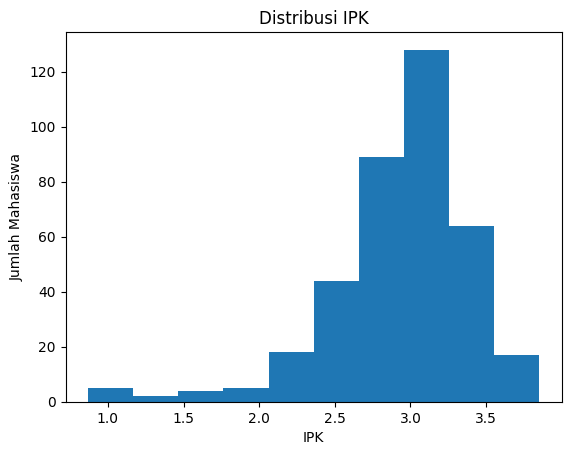

In [ ]:
# Histogram IPK
# Clean column names by stripping whitespace
data.columns = data.columns.str.strip()
plt.hist(data['IPK'])
plt.title("Distribusi IPK")
plt.xlabel("IPK")
plt.ylabel("Jumlah Mahasiswa")
plt.show()

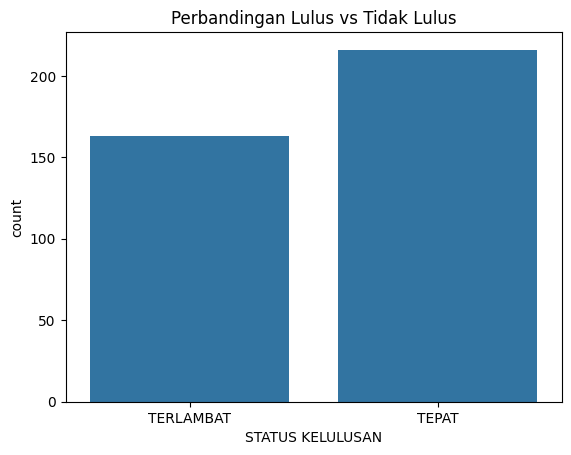

In [ ]:
# Countplot Kelulusan
sns.countplot(x='STATUS KELULUSAN', data=data)
plt.title("Perbandingan Lulus vs Tidak Lulus")
plt.show()

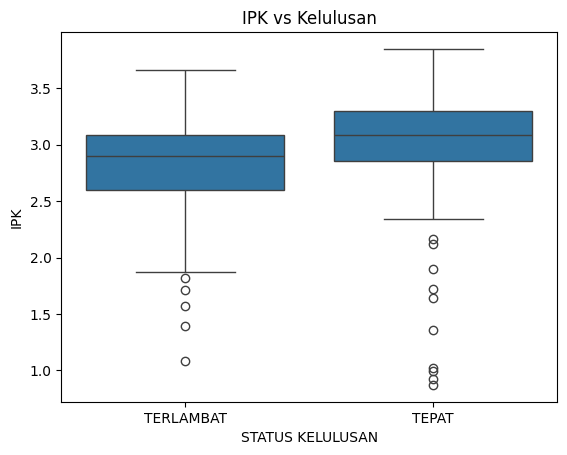

In [ ]:
# Boxplot IPK berdasarkan status kelulusan
sns.boxplot(x='STATUS KELULUSAN', y='IPK', data=data)
plt.title("IPK vs Kelulusan")
plt.show()

In [ ]:
# 1. Tangani missing values
df = data.dropna().copy()

In [ ]:
# 2. Label encoding kolom Kelulusan
label = LabelEncoder()
df['STATUS KELULUSAN'] = label.fit_transform(df['STATUS KELULUSAN'])  # Lulus=1, Tidak Lulus=0

/tmp/ipython-input-3529653397.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['STATUS KELULUSAN'] = label.fit_transform(df['STATUS KELULUSAN'])  # Lulus=1, Tidak Lulus=0


In [ ]:
# BAGIAN C — PREPROCESSING

# 1. Tangani missing values
df = df.dropna()

# 2. Label encoding kolom Kelulusan
label = LabelEncoder()
df['STATUS KELULUSAN'] = label.fit_transform(df['STATUS KELULUSAN'])  # Lulus=1, Tidak Lulus=0

# 3. Pisahkan fitur & label
X = df.drop('STATUS KELULUSAN', axis=1)
y = df['STATUS KELULUSAN']

# Drop 'NAMA' column as it's an identifier
X_processed = X.drop('NAMA', axis=1)

# Encode other categorical columns using LabelEncoder
categorical_cols_to_encode = ['JENIS KELAMIN', 'STATUS MAHASISWA', 'STATUS NIKAH']
for col in categorical_cols_to_encode:
    le = LabelEncoder()
    X_processed[col] = le.fit_transform(X_processed[col])

# 4. Feature scaling (wajib untuk SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_processed)

# 5. Train-test split (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [ ]:
# BAGIAN D — TRAINING MODEL SVM

# --- MODEL LINEAR ---
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)
pred_linear = svm_linear.predict(X_test)

# --- MODEL RBF ---
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)
pred_rbf = svm_rbf.predict(X_test)

In [ ]:
# BAGIAN D — EVALUASI MODEL
print("===== SVM Linear =====")
print(confusion_matrix(y_test, pred_linear))
print(classification_report(y_test, pred_linear))
print("Akurasi Linear:", accuracy_score(y_test, pred_linear))

print("\n===== SVM RBF =====")
print(confusion_matrix(y_test, pred_rbf))
print(classification_report(y_test, pred_rbf))
print("Akurasi RBF:", accuracy_score(y_test, pred_rbf))

===== SVM Linear =====
[[32  2]
 [ 5 35]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        34
           1       0.95      0.88      0.91        40

    accuracy                           0.91        74
   macro avg       0.91      0.91      0.91        74
weighted avg       0.91      0.91      0.91        74

Akurasi Linear: 0.9054054054054054

===== SVM RBF =====
[[32  2]
 [ 8 32]]
              precision    recall  f1-score   support

           0       0.80      0.94      0.86        34
           1       0.94      0.80      0.86        40

    accuracy                           0.86        74
   macro avg       0.87      0.87      0.86        74
weighted avg       0.88      0.86      0.86        74

Akurasi RBF: 0.8648648648648649


In [ ]:
# ============================
# BAGIAN E — INTERPRETASI MODEL
# ============================

# Mengecek apakah model linear punya coef_
if not hasattr(svm_linear, "coef_"):
    print("SVM Linear tidak memiliki coef_ (model gagal menghitung garis linear).")
elif svm_linear.coef_.size == 0:
    print("SVM Linear memiliki coef_ kosong (model gagal menghitung garis linear).")
else:
    coef = svm_linear.coef_[0]
    fitur = X_processed.columns # Corrected: use X_processed.columns instead of X.columns

    # Pastikan panjang sama
    if len(coef) != len(fitur):
        print("Jumlah fitur dan koefisien tidak sama. Interpretasi tidak dapat dilakukan.")
        print(f"Panjang fitur : {len(fitur)}")
        print(f"Panjang koef  : {len(coef)}")
    else:
        importance = pd.DataFrame({
            'Fitur': fitur,
            'Koefisien': coef
        }).sort_values(by="Koefisien", key=abs, ascending=False)

        print("===== Fitur Paling Berpengaruh ====")
        display(importance.head())

===== Fitur Paling Berpengaruh ====


,Fitur,Koefisien
1,STATUS MAHASISWA,-1.488408
7,IPS 4,-0.831603
8,IPS 5,-0.595370
5,IPS 2,0.563344
4,IPS 1,-0.537986


In [ ]:
# BAGIAN F — DEPLOYMENT SEDERHANA

def predict_status(jenis_kelamin, status_mahasiswa, umur, status_nikah,
                   ips1, ips2, ips3, ips4, ips5, ips6, ips7, ips8, ipk):
    # Re-create label encoders for categorical features and fit them with unique values
    # from the original data. This ensures the function is self-contained if label_encoders
    # were not made global in the preprocessing step.
    global label_encoders
    if 'label_encoders' not in globals():
        label_encoders = {}
        categorical_cols_to_encode = ['JENIS KELAMIN', 'STATUS MAHASISWA', 'STATUS NIKAH']
        for col in categorical_cols_to_encode:
            le = LabelEncoder()
            # Fit on the original column data from the 'data' DataFrame
            le.fit(data[col])
            label_encoders[col] = le

    # Create a DataFrame for the input, ensuring column names match the training data
    input_data_dict = {
        'JENIS KELAMIN': [jenis_kelamin],
        'STATUS MAHASISWA': [status_mahasiswa],
        'UMUR': [umur],
        'STATUS NIKAH': [status_nikah],
        'IPS 1': [ips1],
        'IPS 2': [ips2],
        'IPS 3': [ips3],
        'IPS 4': [ips4],
        'IPS 5': [ips5],
        'IPS 6': [ips6],
        'IPS 7': [ips7],
        'IPS 8': [ips8],
        'IPK': [ipk]
    }
    input_df = pd.DataFrame(input_data_dict)

    # Encode categorical features using the (re-)fitted label encoders
    categorical_cols_to_encode = ['JENIS KELAMIN', 'STATUS MAHASISWA', 'STATUS NIKAH']
    for col in categorical_cols_to_encode:
        if col in input_df.columns and col in label_encoders:
            input_df[col] = label_encoders[col].transform(input_df[col])

    # Ensure the order of columns matches the training data (X_processed)
    # The order of features when scaler was fitted:
    feature_columns_order = ['JENIS KELAMIN', 'STATUS MAHASISWA', 'UMUR', 'STATUS NIKAH',
                             'IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6',
                             'IPS 7', 'IPS 8', 'IPK']

    # Select and reorder columns to match feature_columns_order
    input_df_ordered = input_df[feature_columns_order]

    # Scale the numerical features
    data_scaled = scaler.transform(input_df_ordered)

    # Make prediction
    pred = svm_rbf.predict(data_scaled)[0]
    return "Lulus" if pred == 1 else "Tidak Lulus"

# Contoh uji coba
print("\nContoh Prediksi:")
# Example values based on the first row of your original data (after cleaning and encoding):
# JENIS KELAMIN='PEREMPUAN', STATUS MAHASISWA='BEKERJA', UMUR=28, STATUS NIKAH='BELUM MENIKAH',
# IPS 1=2.76, IPS 2=2.94, IPS 3=2.92, IPS 4=2.98, IPS 5=2.98, IPS 6=2.98, IPS 7=2.98, IPS 8=2.98, IPK=2.96
print(predict_status(jenis_kelamin='PEREMPUAN', status_mahasiswa='BEKERJA', umur=28, status_nikah='BELUM MENIKAH',
                       ips1=2.76, ips2=2.94, ips3=2.92, ips4=2.98, ips5=2.98, ips6=2.98, ips7=2.98, ips8=2.98, ipk=2.96))



Contoh Prediksi:
Lulus
